In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Generate x values
x_values = np.linspace(10, 20, 10)

# Generate y values (y=x)
y_values = x_values

# Combine x and y values into a single array
data = np.column_stack((x_values, y_values))

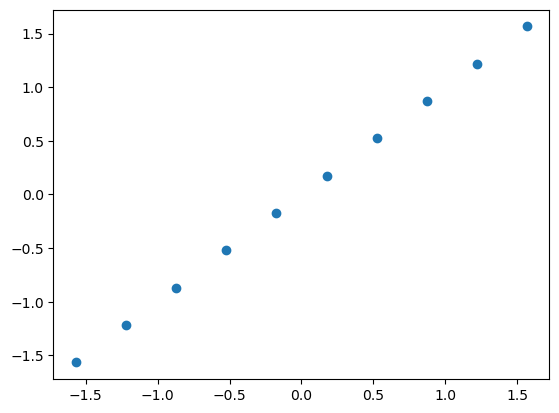

In [21]:
# Step 2: Standardize the Data
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1])

In [22]:
# Step 3: Compute the Covariance Matrix
cov_matrix = np.cov(data_standardized, rowvar=False)
cov_matrix

array([[1.11111111, 1.11111111],
       [1.11111111, 1.11111111]])

In [23]:
# Step 4: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[0.         2.22222222]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


In [24]:
# Step 5: Select Principal Components
# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print(eigenvalues)
print(eigenvectors)
# Choose the number of principal components (k)
k = 2
principal_components = eigenvectors[:, :k]
print(f"Principle: {principal_components}, {principal_components.shape}")

[2.22222222 0.        ]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Principle: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]], (2, 2)


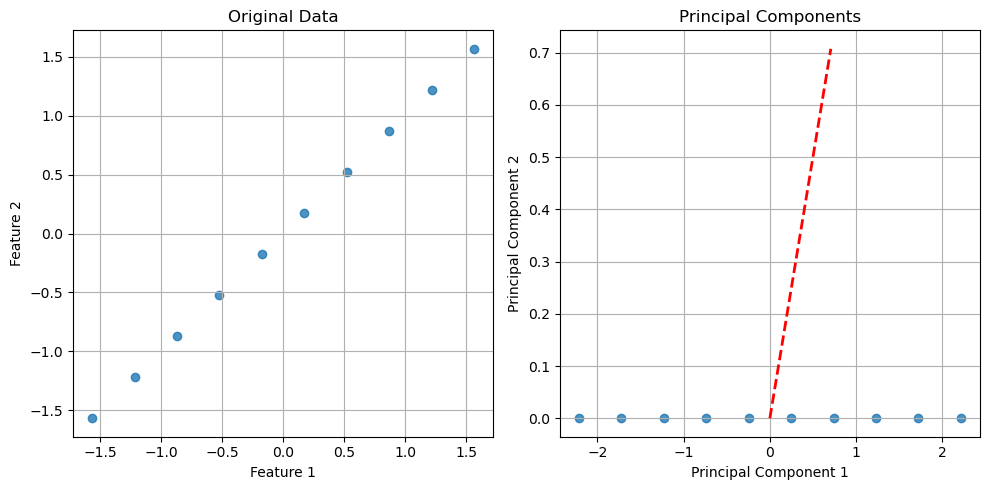

In [25]:
# Step 6: Project Data onto Principal Components
data_pca = np.dot(data_standardized, principal_components)

# Plot the original data and principal components
plt.figure(figsize=(10, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], alpha=0.8)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Plot principal components
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.8)
plt.title('Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Plot line through centroid in the direction of first eigenvector
centroid = np.mean(data_standardized, axis=0)
plt.plot([centroid[0], centroid[0] + eigenvectors[0, 0]], 
         [centroid[1], centroid[1] + eigenvectors[1, 0]], 
         color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.show()

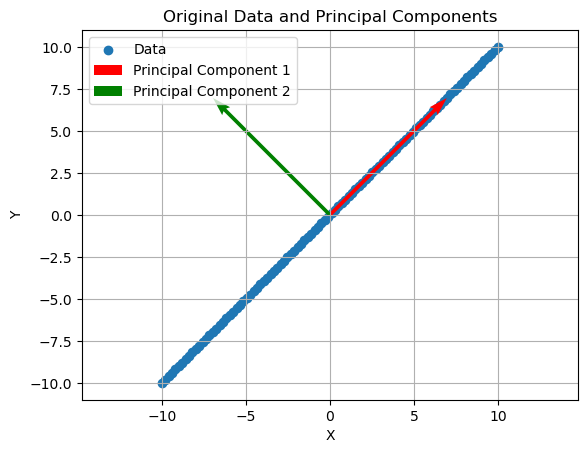

In [34]:
# Generate x values
x_values = np.linspace(-10, 10, 100)

# Generate y values (y=x)
y_values = x_values

# Combine x and y values into a single array
data = np.column_stack((x_values, y_values))

# Step 2: Perform Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=2)
pca.fit(data)

# Get the principal components
pc1 = pca.components_[0]  # The first principal component
pc2 = pca.components_[1]  # The second principal component

# Step 3: Plot the original data and principal components
plt.scatter(data[:, 0], data[:, 1], label='Data')
plt.quiver(*np.mean(data, axis=0), *pc1, color='r', scale=3, label='Principal Component 1')
plt.quiver(*np.mean(data, axis=0), *pc2, color='g', scale=3, label='Principal Component 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Original Data and Principal Components')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


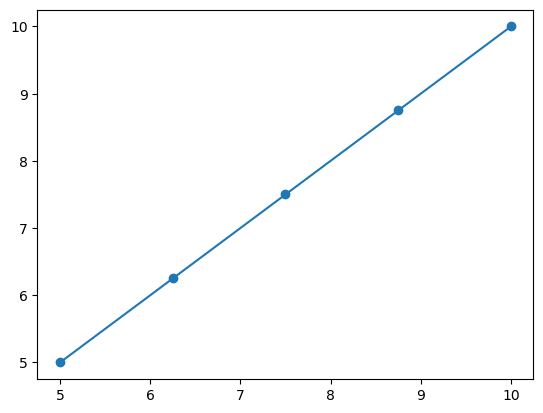

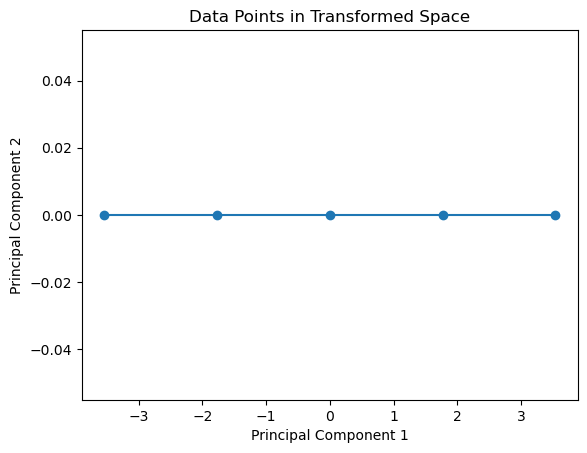

a Vectors: [[1.97642354 0.        ]
 [1.97642354 0.        ]]


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate data
x = np.linspace(5, 10, 5).reshape(-1, 1)
y = x
data = np.hstack((x,y))
plt.scatter(x, y)
plt.plot(x,y)

# Perform PCA
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(data)

# Get principal components and explained variance
principal_components = pca.components_
explained_variance = pca.explained_variance_

# Calculate "a" vectors
a_vectors = np.abs(principal_components) * np.sqrt(explained_variance)

# Visualize data points in transformed space
plt.figure()
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.plot(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Data Points in Transformed Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("a Vectors:", a_vectors)


In [50]:
transformed_data[:, 0]

array([ 3.53553391,  1.76776695, -0.        , -1.76776695, -3.53553391])